In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import kruskal

In [3]:
urban_train_df = pd.read_csv("urban_train_df.csv")

In [4]:
urban_train_df.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Downtown,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,Medium,urban,958061.50
1,Downtown,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,Medium,urban,693454.50
2,Downtown,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,Medium,urban,922103.10
3,Downtown,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,Low,urban,467711.46
4,Downtown,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,Medium,urban,665358.21


In [5]:
urban_train_df.shape

(1953, 16)

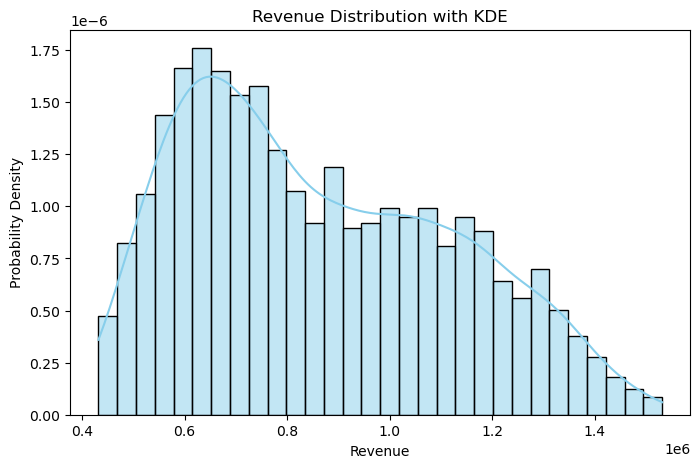

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data=urban_train_df, x='Revenue', kde=True, bins=30, color='skyblue',stat='density')

plt.title('Revenue Distribution with KDE')
plt.xlabel('Revenue')
plt.ylabel('Probability Density')
plt.show()

In [7]:
urban_train_df['log_revenue'] = np.log(urban_train_df['Revenue'])  # or np.log1p if any very small values

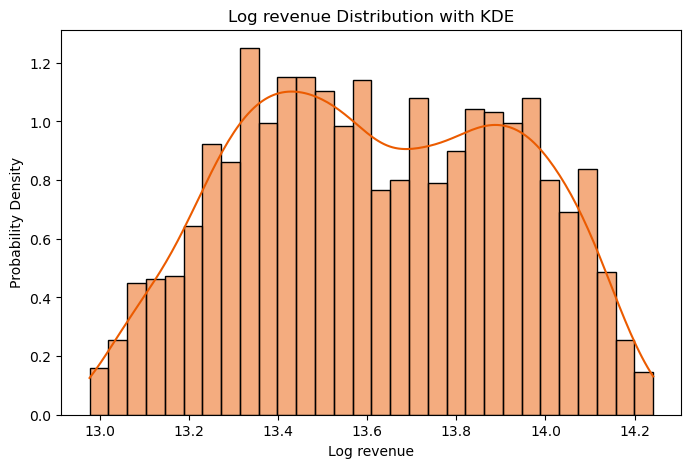

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=urban_train_df, x='log_revenue', kde=True, bins=30, color='#EB5B00',stat='density')

plt.title('Log revenue Distribution with KDE')
plt.xlabel('Log revenue')
plt.ylabel('Probability Density')
plt.show()

In [9]:
stat, p = shapiro(urban_train_df['log_revenue'])
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")

Shapiro-Wilk test statistic = 0.9739, p-value = 0.0000


In [10]:
urban_train_df['revenue_boxcox'], fitted_lambda = boxcox(urban_train_df['Revenue'])
print(f"Lambda used for Box-Cox: {fitted_lambda}")

Lambda used for Box-Cox: -0.0035085528676103146


In [11]:
stat, p = shapiro(urban_train_df['revenue_boxcox'])
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")

Shapiro-Wilk test statistic = 0.9739, p-value = 0.0000


## Revenue is not normal but range large there for use log transformation

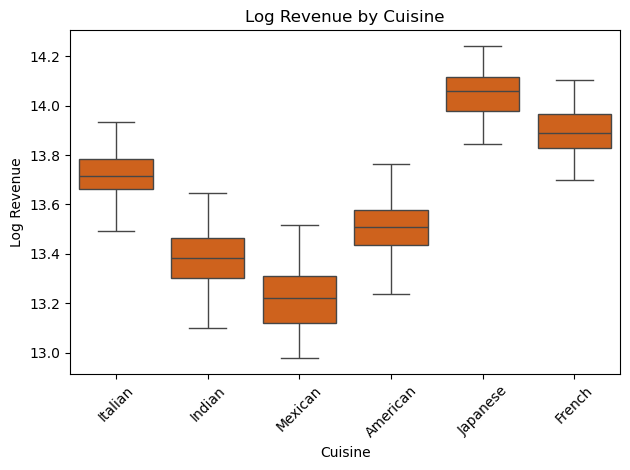

In [13]:
sns.boxplot(data=urban_train_df, x='Cuisine', y='log_revenue', color= "#EB5B00")

# Optional formatting
plt.title('Log Revenue by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

In [14]:
groups = [group['log_revenue'].values for name, group in urban_train_df.groupby('Cuisine')]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis statistic = 1732.9832, p-value = 0.0000


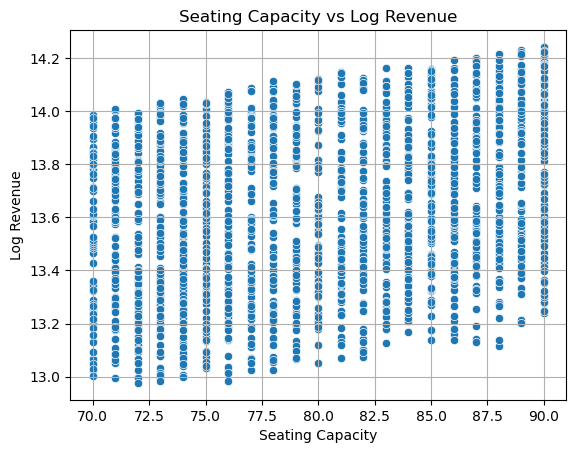

In [15]:
sns.scatterplot(data=urban_train_df, x='Seating Capacity', y='log_revenue')

# Optional enhancements
plt.title('Seating Capacity vs Log Revenue')
plt.xlabel('Seating Capacity')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

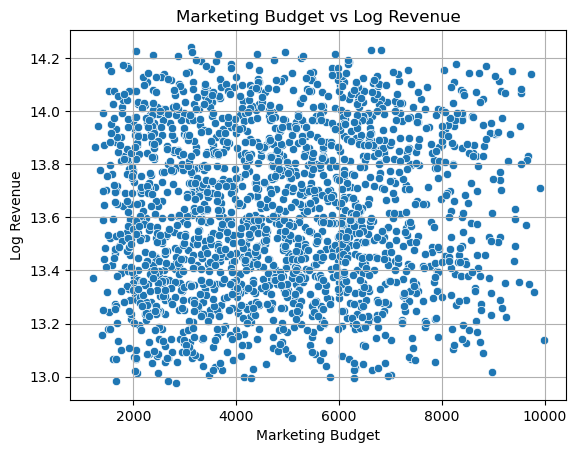

In [16]:
sns.scatterplot(data=urban_train_df, x='Marketing Budget', y='log_revenue')

# Optional enhancements
plt.title('Marketing Budget vs Log Revenue')
plt.xlabel('Marketing Budget')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

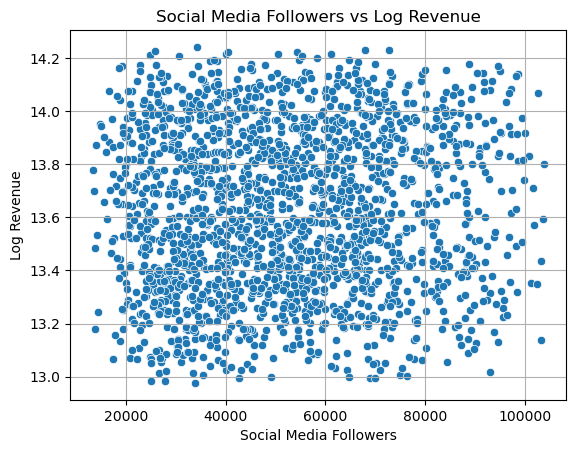

In [21]:
sns.scatterplot(data=urban_train_df, x='Social Media Followers', y='log_revenue')

# Optional enhancements
plt.title('Social Media Followers vs Log Revenue')
plt.xlabel('Social Media Followers')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

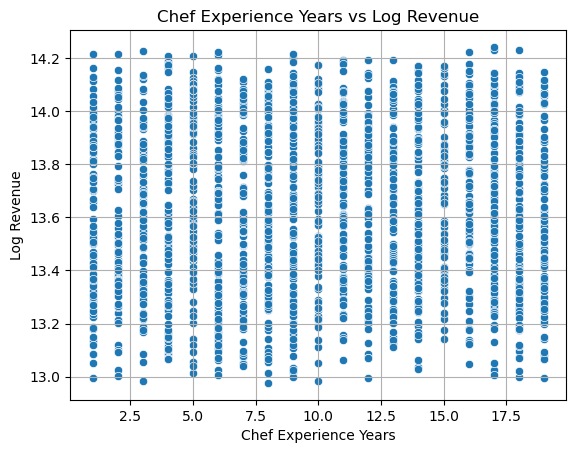

In [22]:
sns.scatterplot(data=urban_train_df, x='Chef Experience Years', y='log_revenue')

# Optional enhancements
plt.title('Chef Experience Years vs Log Revenue')
plt.xlabel('Chef Experience Years')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

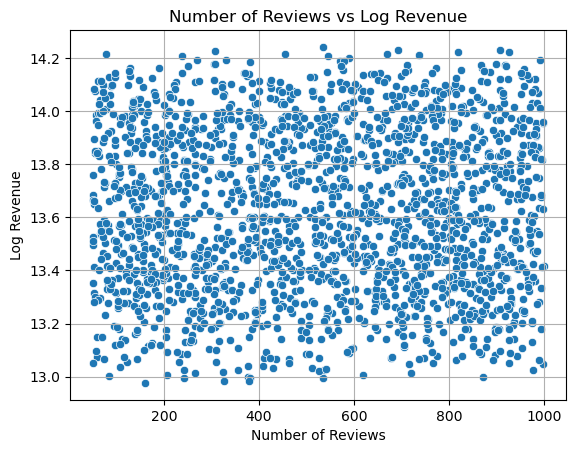

In [25]:
sns.scatterplot(data=urban_train_df, x='Number of Reviews', y='log_revenue')

# Optional enhancements
plt.title('Number of Reviews vs Log Revenue')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

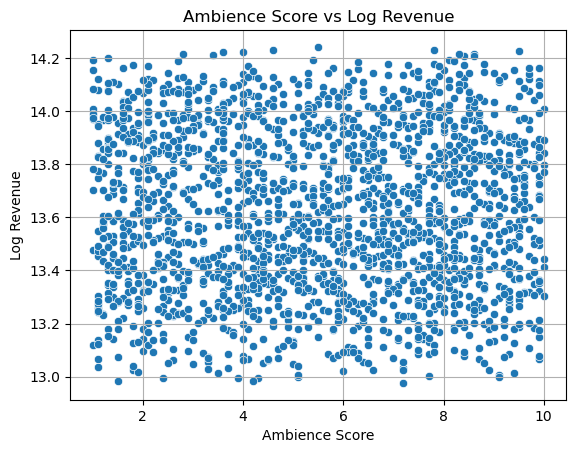

In [28]:
sns.scatterplot(data=urban_train_df, x='Ambience Score', y='log_revenue')

# Optional enhancements
plt.title('Ambience Score vs Log Revenue')
plt.xlabel('Ambience Score')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

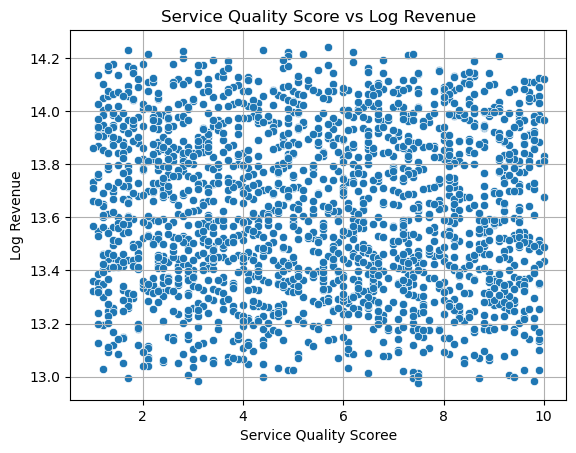

In [31]:
sns.scatterplot(data=urban_train_df, x='Service Quality Score', y='log_revenue')

# Optional enhancements
plt.title('Service Quality Score vs Log Revenue')
plt.xlabel('Service Quality Scoree')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

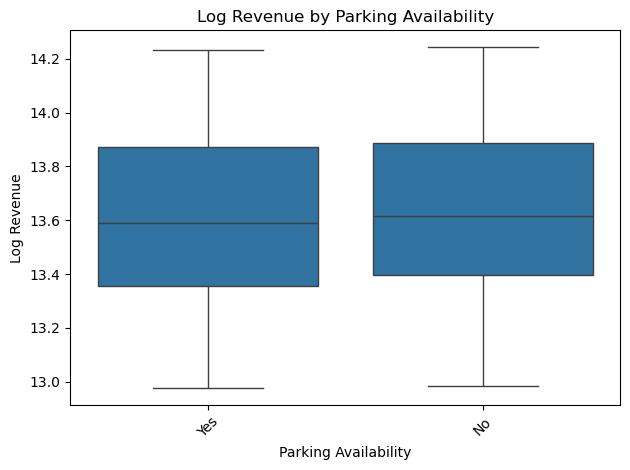

In [33]:
sns.boxplot(data=urban_train_df, x='Parking Availability', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Parking Availability')
plt.xlabel('Parking Availability')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

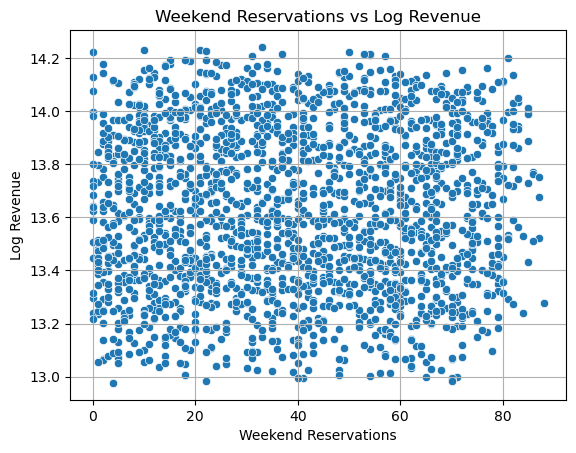

In [35]:
sns.scatterplot(data=urban_train_df, x='Weekend Reservations', y='log_revenue')

# Optional enhancements
plt.title('Weekend Reservations vs Log Revenue')
plt.xlabel('Weekend Reservations')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

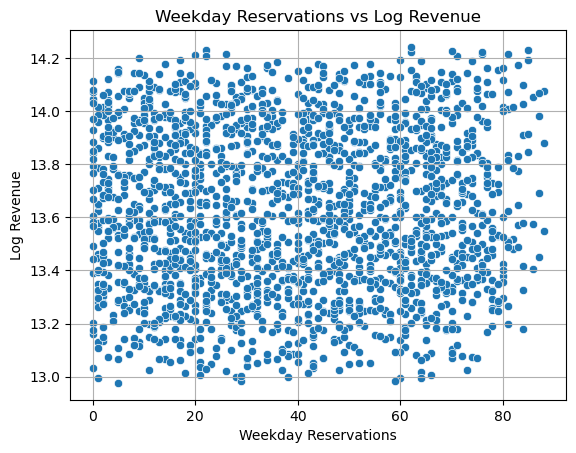

In [36]:
sns.scatterplot(data=urban_train_df, x='Weekday Reservations', y='log_revenue')

# Optional enhancements
plt.title('Weekday Reservations vs Log Revenue')
plt.xlabel('Weekday Reservations')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

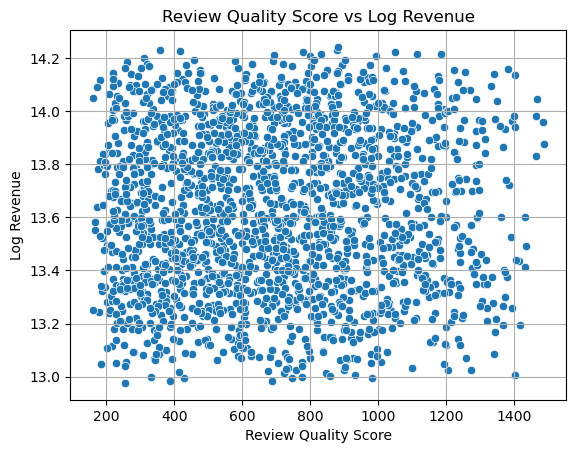

In [37]:
sns.scatterplot(data=urban_train_df, x='Review Quality Score', y='log_revenue')

# Optional enhancements
plt.title('Review Quality Score vs Log Revenue')
plt.xlabel('Review Quality Score')
plt.ylabel('Log Revenue')
plt.grid(True)
plt.show()

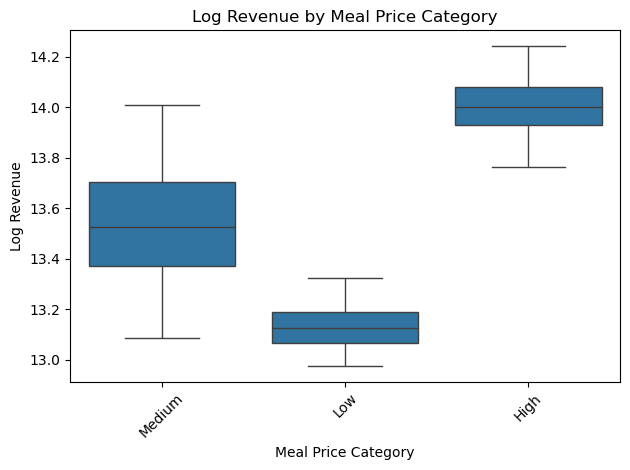

In [38]:
sns.boxplot(data=urban_train_df, x='Meal Price Category', y='log_revenue')

# Optional formatting
plt.title('Log Revenue by Meal Price Category')
plt.xlabel('Meal Price Category')
plt.ylabel('Log Revenue')
plt.xticks(rotation=45)  # rotate labels if locations have long names
plt.tight_layout()
plt.show()

In [40]:
groups = [group['log_revenue'].values for name, group in urban_train_df.groupby('Meal Price Category')]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis statistic = 1260.9771, p-value = 0.0000


In [42]:
urban_train_df.columns

Index(['Location', 'Cuisine', 'Seating Capacity', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Review Quality Score',
       'Meal Price Category', 'clusters', 'Revenue', 'log_revenue',
       'revenue_boxcox'],
      dtype='object')

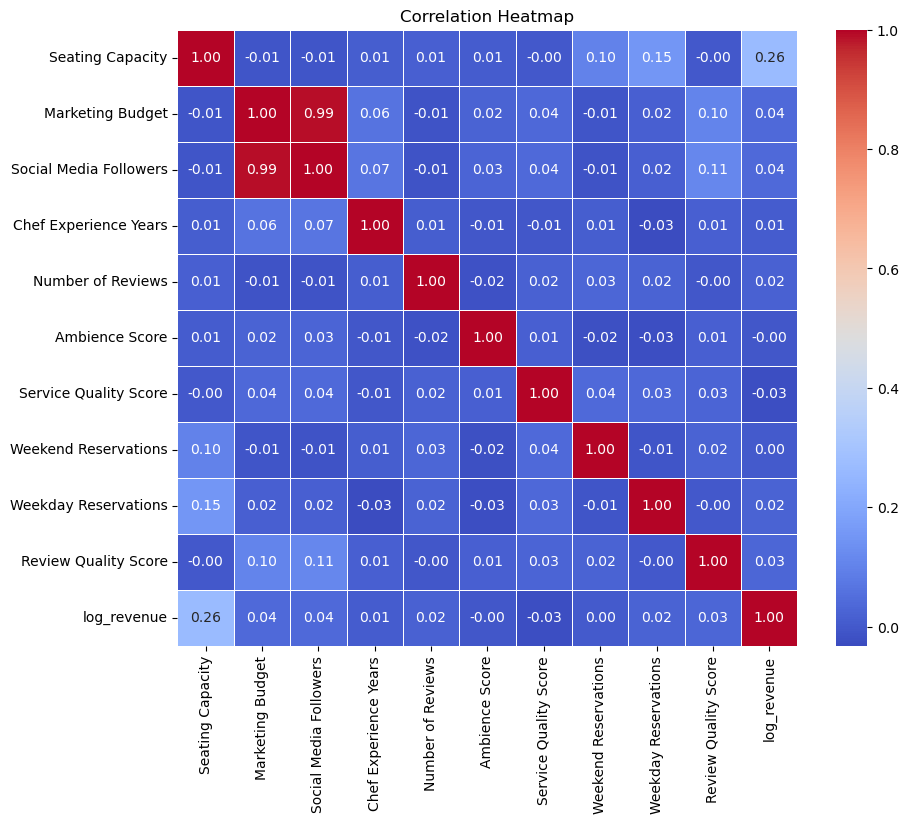

In [44]:
# Correct way to select multiple columns
numeric_df = urban_train_df[['Seating Capacity', 'Marketing Budget', 'Social Media Followers', 
                                 'Chef Experience Years', 'Number of Reviews', 'Ambience Score', 
                                 'Service Quality Score', 'Weekend Reservations', 
                                 'Weekday Reservations', 'Review Quality Score', 'log_revenue']]

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

In [45]:
urban_train_df.groupby('Cuisine')['Meal Price Category'].value_counts(normalize=True).unstack()


Meal Price Category,High,Low,Medium
Cuisine,,,
American,NaN,NaN,1.000000
French,0.583587,NaN,0.416413
Indian,NaN,0.003049,0.996951
Italian,NaN,NaN,1.000000
Japanese,1.000000,NaN,NaN
Mexican,NaN,0.492447,0.507553


In [47]:
urban_train_df[urban_train_df['Cuisine'] == 'Mexican']['Revenue'].describe()


count       331.000000
mean     555953.103293
std       69876.445875
min      432117.990000
25%      498958.405000
50%      551633.610000
75%      604003.785000
max      741029.740000
Name: Revenue, dtype: float64

In [49]:
urban_train_df.groupby('Cuisine')['Seating Capacity'].mean().sort_values()


Cuisine
Mexican     79.341390
French      79.683891
American    80.005831
Japanese    80.091837
Indian      80.173780
Italian     80.481707
Name: Seating Capacity, dtype: float64

In [51]:
urban_train_df['Chef Experience Years'].describe()


count    1953.000000
mean       10.102919
std         5.458220
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        19.000000
Name: Chef Experience Years, dtype: float64

In [52]:
urban_train_df['Marketing Budget'].describe()


count    1953.000000
mean     4819.930876
std      2014.736450
min      1209.000000
25%      3161.000000
50%      4711.000000
75%      6308.000000
max      9978.000000
Name: Marketing Budget, dtype: float64

In [54]:
urban_train_df.groupby('Cuisine')['Revenue'].mean().sort_values()


Cuisine
Mexican     5.559531e+05
Indian      6.559484e+05
American    7.351906e+05
Italian     9.118286e+05
French      1.090369e+06
Japanese    1.268784e+06
Name: Revenue, dtype: float64

In [57]:
urban_train_df['Seating Capacity'].describe()


count    1953.000000
mean       79.960061
std         6.052828
min        70.000000
25%        74.000000
50%        80.000000
75%        85.000000
max        90.000000
Name: Seating Capacity, dtype: float64

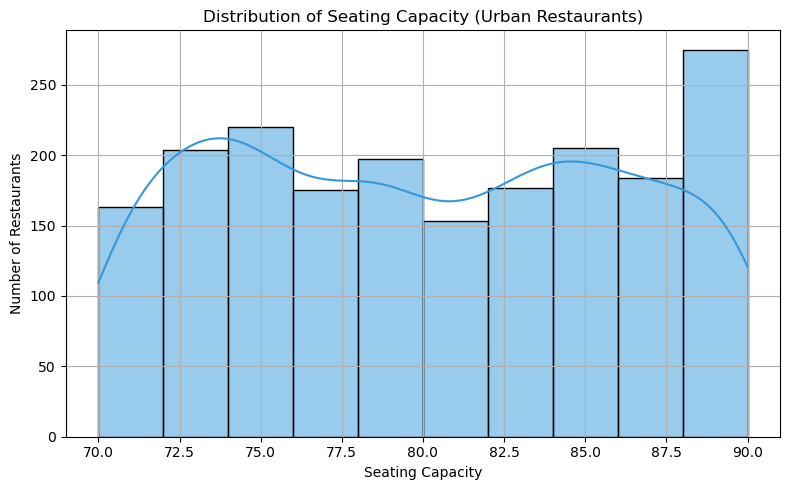

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(urban_train_df['Seating Capacity'], bins=10, kde=True, color='#3498db')
plt.title('Distribution of Seating Capacity (Urban Restaurants)')
plt.xlabel('Seating Capacity')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.tight_layout()
plt.show()


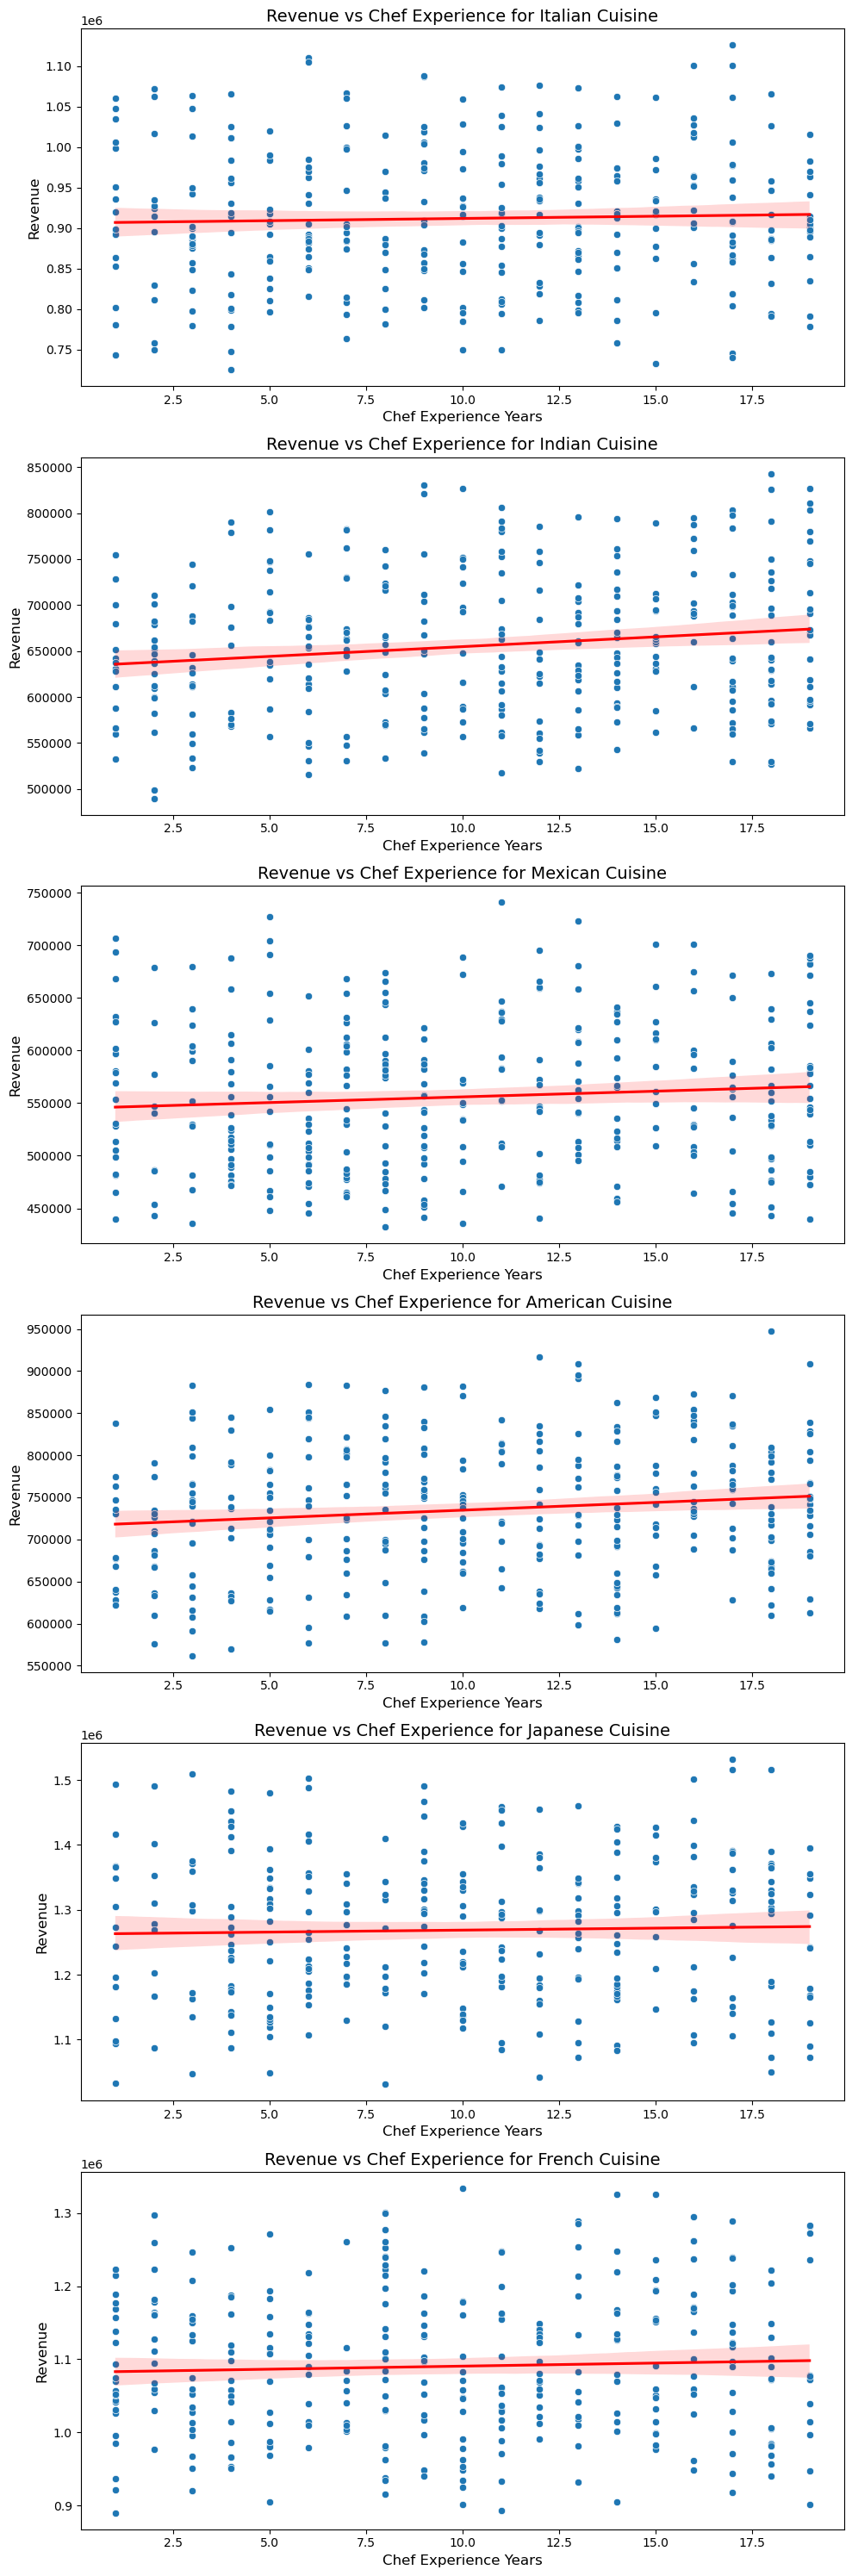

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is nonurban_train_df with 'Cuisine_Type', 'Chef_Experience_Yrs', and 'Revenue'
# Create a unique plot for each cuisine type
cuisine_types = urban_train_df['Cuisine'].unique()

# Set the number of rows and columns for subplots based on the number of cuisine types
n_cuisines = len(cuisine_types)
fig, axes = plt.subplots(n_cuisines, 1, figsize=(10, 5 * n_cuisines))

if n_cuisines == 1:
    axes = [axes]  # To make it iterable when only one subplot

# Loop over each cuisine type and create the plot
for i, cuisine in enumerate(cuisine_types):
    ax = axes[i]
    # Filter data for the specific cuisine
    cuisine_data = urban_train_df[urban_train_df['Cuisine'] == cuisine]
    
    # Create the scatter plot
    sns.scatterplot(data=cuisine_data, x='Chef Experience Years', y='Revenue', ax=ax)
    
    # Set plot title and labels
    ax.set_title(f"Revenue vs Chef Experience for {cuisine} Cuisine", fontsize=14)
    ax.set_xlabel('Chef Experience (Years)', fontsize=12)
    ax.set_ylabel('Revenue', fontsize=12)
    
    # Optional: add a regression line for better insight
    sns.regplot(data=cuisine_data, x='Chef Experience Years', y='Revenue', ax=ax, scatter=False, color='r')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save and show the plot
plt.savefig('cuisine_revenue_vs_experience_nonurban.png', dpi=300)
plt.show()


In [81]:
print(urban_train_df.columns)


Index(['Location', 'Cuisine', 'Seating Capacity', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Review Quality Score',
       'Meal Price Category', 'clusters', 'Revenue', 'log_revenue',
       'revenue_boxcox'],
      dtype='object')


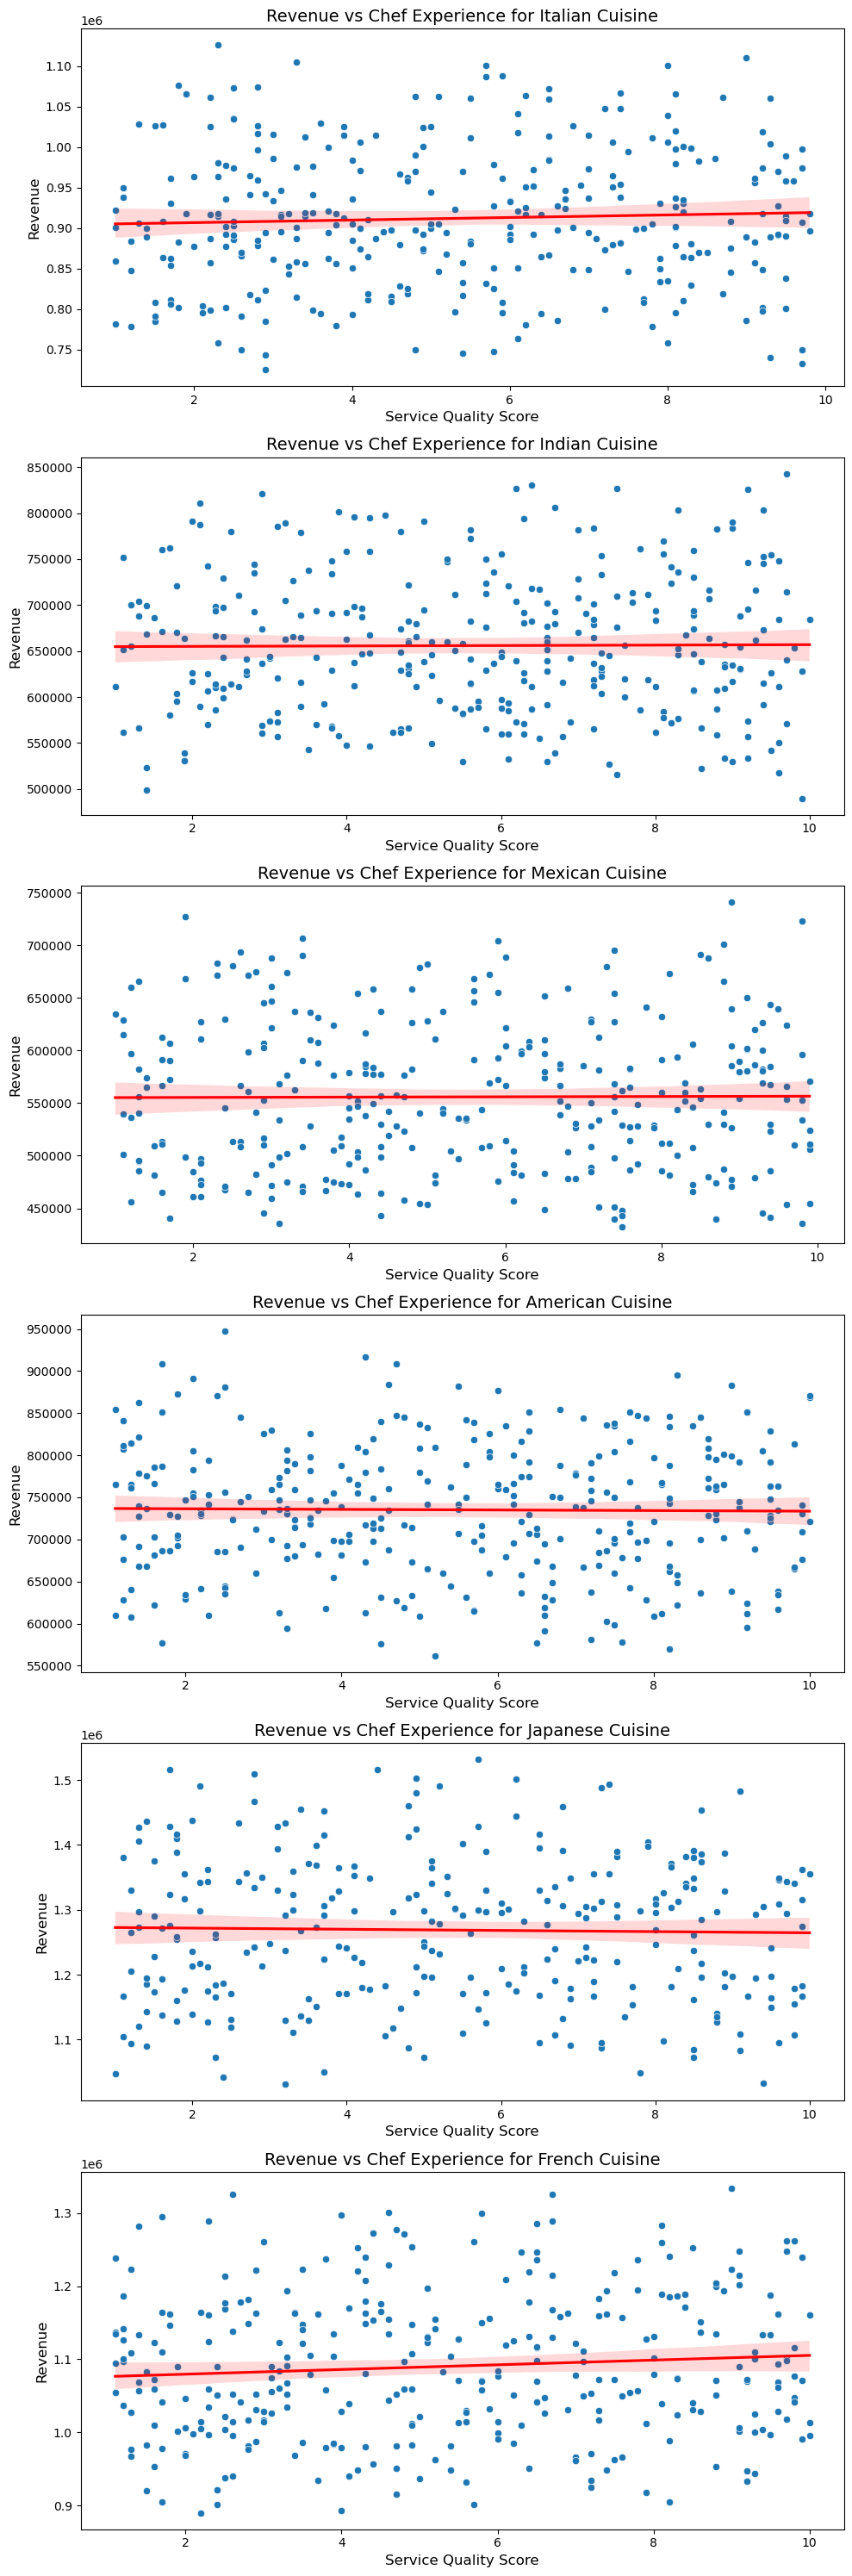

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is nonurban_train_df with 'Cuisine_Type', 'Chef_Experience_Yrs', and 'Revenue'
# Create a unique plot for each cuisine type
cuisine_types = urban_train_df['Cuisine'].unique()

# Set the number of rows and columns for subplots based on the number of cuisine types
n_cuisines = len(cuisine_types)
fig, axes = plt.subplots(n_cuisines, 1, figsize=(10, 5 * n_cuisines))

if n_cuisines == 1:
    axes = [axes]  # To make it iterable when only one subplot

# Loop over each cuisine type and create the plot
for i, cuisine in enumerate(cuisine_types):
    ax = axes[i]
    # Filter data for the specific cuisine
    cuisine_data = urban_train_df[urban_train_df['Cuisine'] == cuisine]
    
    # Create the scatter plot
    sns.scatterplot(data=cuisine_data, x='Service Quality Score', y='Revenue', ax=ax)
    
    # Set plot title and labels
    ax.set_title(f"Revenue vs Chef Experience for {cuisine} Cuisine", fontsize=14)
    ax.set_xlabel('Chef Experience (Years)', fontsize=12)
    ax.set_ylabel('Revenue', fontsize=12)
    
    # Optional: add a regression line for better insight
    sns.regplot(data=cuisine_data, x='Service Quality Score', y='Revenue', ax=ax, scatter=False, color='r')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save and show the plot
plt.savefig('cuisine_revenue_vs_experience_nonurban.png', dpi=300)
plt.show()


In [87]:
urban_train_df['Cuisine'].value_counts(normalize=True) * 100


Cuisine
American    17.562724
Mexican     16.948285
French      16.845878
Italian     16.794675
Indian      16.794675
Japanese    15.053763
Name: proportion, dtype: float64